# Logistic Regression Exercise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [4]:
df = pd.read_csv('/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/hearing_test.csv')

In [5]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


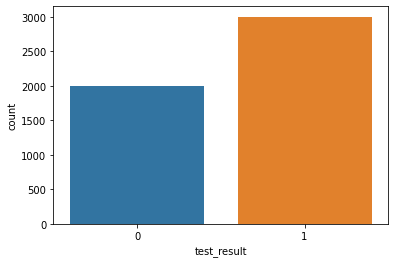

In [11]:
sns.countplot(df['test_result'])

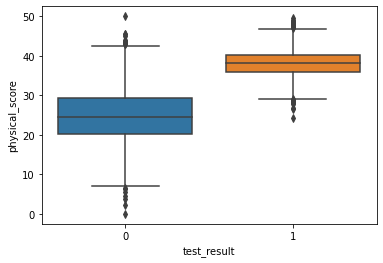

In [28]:
sns.boxplot(y=df['physical_score'] , x=df['test_result'])

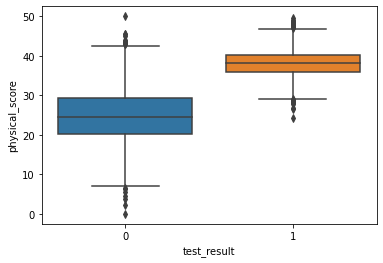

In [29]:
sns.boxplot(x=df['test_result'] , y=df['physical_score'])

## There is clearly a difference in the test results of people with different physical scores and age. Thes plots are indicative of the fact that test result is dependent on physical scores and age.

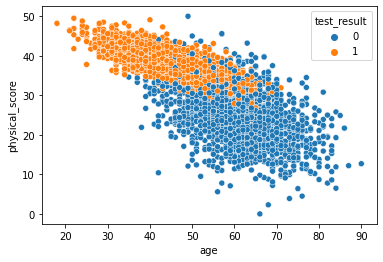

In [33]:
sns.scatterplot(x = 'age',y = 'physical_score', data =df , hue = 'test_result')

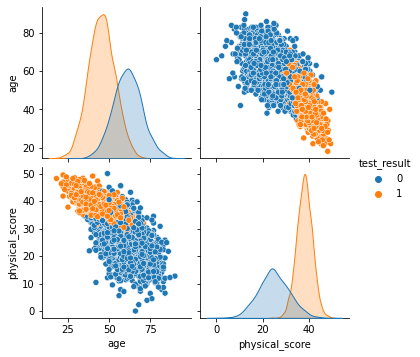

In [38]:
sns.pairplot(df , hue ='test_result')

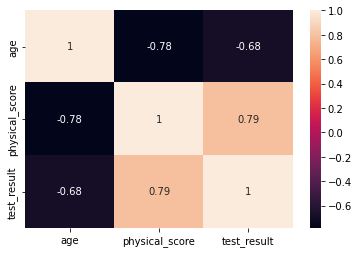

In [40]:
sns.heatmap(df.corr() , annot=True)

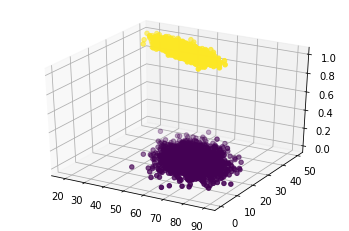

In [41]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
X = df.drop('test_result', axis=1)
y = df['test_result']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1 , random_state= 12345)

In [53]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [56]:
log_model.coef_

array([[-0.88599043,  3.48818131]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [66]:
y_pred = log_model.predict(scaled_X_test)
y_log_pred = log_model.predict_log_proba(scaled_X_test)

In [67]:
confusion_matrix(y_test, y_pred)

array([[179,  23],
       [ 16, 282]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       202
           1       0.92      0.95      0.94       298

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


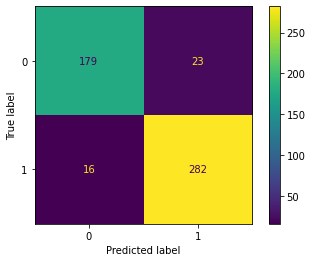

In [70]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

## Evaluating Curves and AUC


In [74]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve , plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


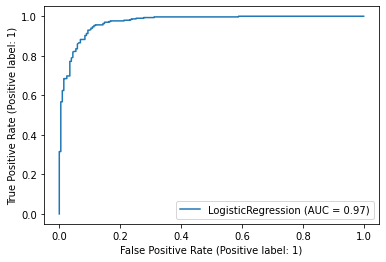

In [76]:
plot_roc_curve(log_model , scaled_X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


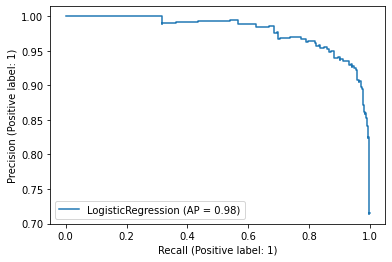

In [78]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

# Multi-Class Logistic Regression


In [79]:
df = pd.read_csv('/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/iris.csv')

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


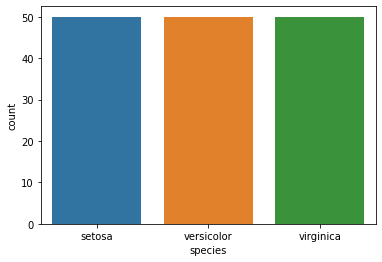

In [81]:
sns.countplot(df['species'])

50 datapoints of each species

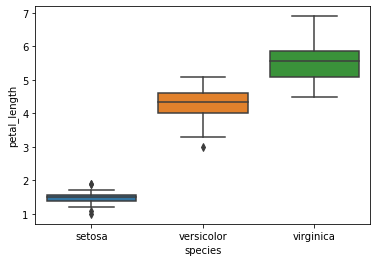

In [84]:
sns.boxplot(x='species', y='petal_length', hue=None, data=df)

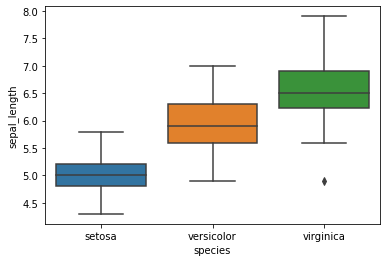

In [85]:
sns.boxplot(x='species', y='sepal_length', hue=None, data=df)

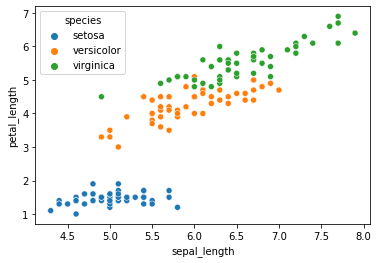

In [86]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data = df)

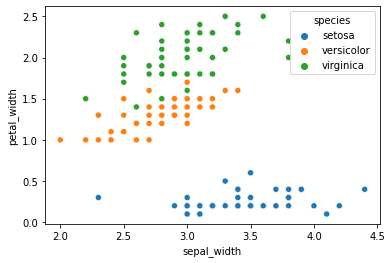

In [87]:
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data = df)

Sesota's features are distinguishable from other species but versicolor, virginica have similar features except for petal length.

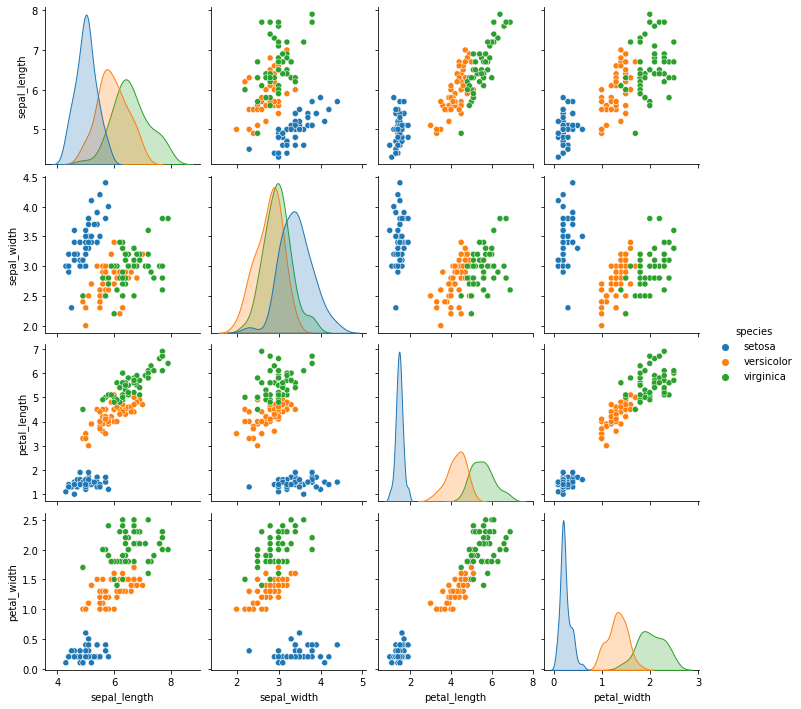

In [90]:
sns.pairplot(df, hue = 'species')

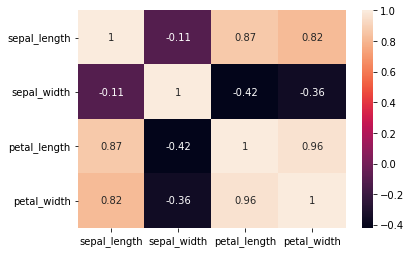

In [91]:
sns.heatmap(df.corr(), annot = True)

Performing Logistic regression with Gridsearch.

In [103]:
mul_reg = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 5000)        # saga allows L1 regularization and is fast for large datasets.

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [104]:
from sklearn.model_selection import GridSearchCV

In [106]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [109]:
grid_model = GridSearchCV(log_model, param_grid={'C':C,'penalty':penalty})

In [94]:
X = df.drop('species', axis = 1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [96]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [110]:
grid_model.fit(scaled_X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the followin

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [112]:
y_pred = grid_model.predict(scaled_X_test)

In [115]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [116]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


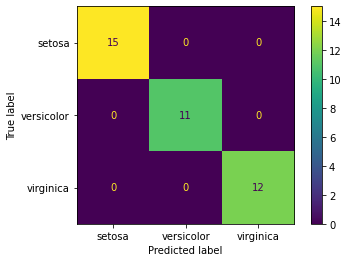

In [119]:
plot_confusion_matrix(grid_model,scaled_X_test,y_pred)